In [1]:
!pip install seaborn
!pip install keras

In [2]:
"""
BUAN 6341: Applied Machine Learning
Homework 1_Logistic Regression

Siddhartha Shankar
"""
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import random
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics

from keras import Sequential
from keras.layers import Dense

import warnings
warnings.filterwarnings('ignore')

Using TensorFlow backend.


ModuleNotFoundError: No module named 'tensorflow'

In [3]:
os.getcwd()

"C:\\Users\\s_s11\\OneDrive\\Desktop\\Sem 4 - Fall'19\\Applied Machine Learning\\Homework\\Homework 3"

In [4]:
energy_data = pd.read_csv("energydata_complete.csv")
energy_data

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [5]:
print(energy_data.isnull().any())
print(energy_data.isnull().sum())

date           False
Appliances     False
lights         False
T1             False
RH_1           False
T2             False
RH_2           False
T3             False
RH_3           False
T4             False
RH_4           False
T5             False
RH_5           False
T6             False
RH_6           False
T7             False
RH_7           False
T8             False
RH_8           False
T9             False
RH_9           False
T_out          False
Press_mm_hg    False
RH_out         False
Windspeed      False
Visibility     False
Tdewpoint      False
rv1            False
rv2            False
dtype: bool
date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press

In [6]:
energy_data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [7]:
new_energy = energy_data.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,97.694958
std,102.524891
min,10.000000
25%,50.000000
50%,60.000000
75%,100.000000
max,1080.000000


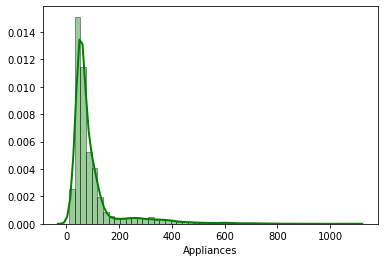

In [8]:
sb.distplot(energy_data['Appliances'], hist=True, kde=True, 
             bins= 50, color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})

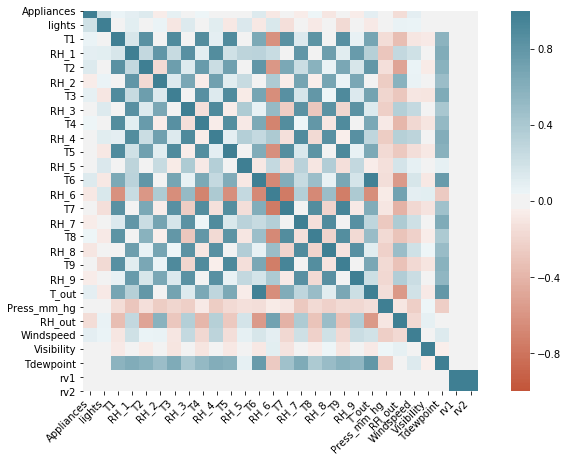

In [9]:
# Correlation Matrix

import seaborn as sb
corr = energy_data.corr()
plt.figure(figsize=(12,7))
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200),
    square=True,
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [10]:
energy_data1 = energy_data.drop(columns=['date','lights', 'T6','RH_6','T8','RH_8','T9','RH_9','rv1', 'rv2', 'Visibility'])
energy_data1.shape


(19735, 18)

In [11]:
energy_data1 = energy_data1.round(3)
energy_data1

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T7,RH_7,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint
0,60,19.890,47.597,19.200,44.790,19.790,44.730,19.000,45.567,17.167,55.200,17.200,41.627,6.600,733.5,92.000,7.000,5.300
1,60,19.890,46.693,19.200,44.722,19.790,44.790,19.000,45.992,17.167,55.200,17.200,41.560,6.483,733.6,92.000,6.667,5.200
2,50,19.890,46.300,19.200,44.627,19.790,44.933,18.927,45.890,17.167,55.090,17.200,41.433,6.367,733.7,92.000,6.333,5.100
3,50,19.890,46.067,19.200,44.590,19.790,45.000,18.890,45.723,17.167,55.090,17.133,41.290,6.250,733.8,92.000,6.000,5.000
4,60,19.890,46.333,19.200,44.530,19.790,45.000,18.890,45.530,17.200,55.090,17.200,41.230,6.133,733.9,92.000,5.667,4.900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.567,46.560,25.890,42.026,27.200,41.163,24.700,45.590,23.200,52.400,24.500,44.500,22.733,755.2,55.667,3.333,13.333
19731,90,25.500,46.500,25.754,42.080,27.133,41.223,24.700,45.590,23.230,52.327,24.557,44.414,22.600,755.2,56.000,3.500,13.300
19732,270,25.500,46.597,25.629,42.769,27.050,41.690,24.700,45.730,23.230,52.267,24.540,44.400,22.467,755.2,56.333,3.667,13.267
19733,420,25.500,46.990,25.414,43.036,26.890,41.290,24.700,45.790,23.200,52.200,24.500,44.296,22.333,755.2,56.667,3.833,13.233


In [ ]:
energy_data_linearReg= preprocessing.normalize(energy_data1)

In [ ]:
y = energy_data_linearReg[:,0]
y = np.transpose(np.array([(y)]))
x = energy_data_linearReg[:,1:18]

In [ ]:
y.shape

In [ ]:
# create training and testing vars
random.seed(144)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30)
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)

In [ ]:
#Assigning X0 = 1 to training and test dataset for matrix multiplication
x_train = np.c_[np.ones((len(x_train),1)),x_train]
x_test = np.c_[np.ones((len(x_test),1)),x_test]

In [ ]:
x_test.shape

In [ ]:
#Cost Function and Gradient descent algorithm

def cost_fn(theta,x,y):
    m = len(y)
    predicted_value = np.dot(x,theta)
    cost = (1/(2*m))* np.sum(np.square(predicted_value-y))
    return cost

def gradient_descent(x,y,theta,lrng_rate,itrs):
    m = len(y)
    cost_log = np.zeros(itrs)
    theta_log = np.zeros((itrs,(x.shape[1])))
    for i in range(itrs):
        
        prediction = np.dot(x,theta)
        
        theta = theta - lrng_rate* (1/m)* (x.T.dot((prediction - y)))
#         print(theta)
        theta_log[i,:] = theta.T
        cost_log[i] = cost_fn(theta,x,y)
    return theta, cost_log, theta_log
    

In [ ]:
lrng_rate = 0.001
itrs = 2000
#theta = np.random.randn(x_train.shape[1],1)
theta = np.zeros(((x_train.shape)[1],1))
#print(theta)
theta,cost_log,theta_log = gradient_descent(x_train,y_train,theta,lrng_rate,itrs)

fig,ax = plt.subplots(figsize=(12,7))

ax.set_ylabel('J(theta)')
ax.set_xlabel('Iterations')
_=ax.plot(range(itrs),cost_log,'r.')

In [ ]:
threshold = 0.0000001
def converge(x, y, theta, lrng_rate, threshold, itrs):
  converged = False
  j = 0
  m=len(y)  
  cost_present = cost_fn(theta,x,y)
  while (converged == False):
        prediction = np.dot(x,theta)
        theta = theta-(1/m)*lrng_rate*(x.T.dot(prediction-y))
        cost_new = cost_fn(theta,x_test,y_test)
        
        if(abs(cost_new - cost_present)  <= threshold or j == itrs) :
              coverged = True
              break
        j+=1
        cost_present = cost_new
  return j,cost_new,theta
#theta = np.random.randn(18,1)
theta = np.zeros(((x.shape)[1]+1,1))
iterations,cost,theta_optimal = converge(x_train, y_train, theta, lrng_rate, threshold, itrs)
print(iterations)
print(cost)

In [ ]:
print(theta_optimal.T)

In [ ]:
predicted_value = np.dot(x_train,theta_optimal)
MSE_train = np.sum(np.square(predicted_value-y_train))
MSE_train

In [ ]:
predicted_value_test = np.dot(x_test,theta_optimal)
MSE_test = np.sum(np.square(predicted_value_test-y_test))
MSE_test

In [ ]:
#Converting the above problem into classification

In [12]:
energy_data1['Appliances'] = np.where(energy_data1['Appliances']<= 100,0,1)
print(energy_data1)

       Appliances      T1    RH_1      T2    RH_2      T3    RH_3      T4  \
0               0  19.890  47.597  19.200  44.790  19.790  44.730  19.000   
1               0  19.890  46.693  19.200  44.722  19.790  44.790  19.000   
2               0  19.890  46.300  19.200  44.627  19.790  44.933  18.927   
3               0  19.890  46.067  19.200  44.590  19.790  45.000  18.890   
4               0  19.890  46.333  19.200  44.530  19.790  45.000  18.890   
...           ...     ...     ...     ...     ...     ...     ...     ...   
19730           0  25.567  46.560  25.890  42.026  27.200  41.163  24.700   
19731           0  25.500  46.500  25.754  42.080  27.133  41.223  24.700   
19732           1  25.500  46.597  25.629  42.769  27.050  41.690  24.700   
19733           1  25.500  46.990  25.414  43.036  26.890  41.290  24.700   
19734           1  25.500  46.600  25.264  42.971  26.823  41.157  24.700   

         RH_4      T5    RH_5      T7    RH_7   T_out  Press_mm_hg  RH_out 

In [13]:
new_energy = energy_data1.filter(['Appliances'], axis=1)
new_energy.describe()

,Appliances
count,19735.000000
mean,0.214492
std,0.410480
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [14]:
Y = energy_data1.iloc[:,0]
print(Y.shape)
X = energy_data1.iloc[:,1:18]
X.shape

(19735,)


(19735, 17)

In [15]:
import random
from sklearn.model_selection import train_test_split
random.seed(144)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)

(15788, 17) (15788,)
(3947, 17) (3947,)


In [16]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
predictions = logmodel.predict(X_test)

confusion_matrix = confusion_matrix(Y_test, predictions)
print(confusion_matrix)

print(classification_report(Y_test,predictions))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, predictions),3)*100))

CV_score_LogModel = (cross_val_score(logmodel, X, Y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
Logistic_CV = round(CV_score_LogModel,2)*100
print("Cross-Validation Score: {}".format(Logistic_CV))

[[2993  109]
 [ 659  186]]
              precision    recall  f1-score   support

           0       0.82      0.96      0.89      3102
           1       0.63      0.22      0.33       845

    accuracy                           0.81      3947
   macro avg       0.73      0.59      0.61      3947
weighted avg       0.78      0.81      0.77      3947

Accuracy Score: 80.5
Cross-Validation Score: 81.0


In [177]:
from sklearn.model_selection import learning_curve

def lrng_curve_accuracy(classifier,n):
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, Y_train, cv=k_fold, scoring='accuracy',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, n))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [176]:
from sklearn.model_selection import learning_curve

def lrng_curve_roc_auc(classifier,n):
    train_sizes, train_scores, test_scores = learning_curve(classifier, X_train, Y_train, cv=k_fold, scoring='roc_auc',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, n))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("roc_auc"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

In [178]:
from sklearn.model_selection import learning_curve

def lrng_curve_neglogloss(Classifier,n):
    
    train_sizes, train_scores, test_scores = learning_curve(Classifier, X_train, Y_train,cv=k_fold, scoring='neg_log_loss',n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, n))

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="red",  label="Training score")
    plt.plot(train_sizes, test_mean, color="green", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    # Create plot
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("Negative_log_loss"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()

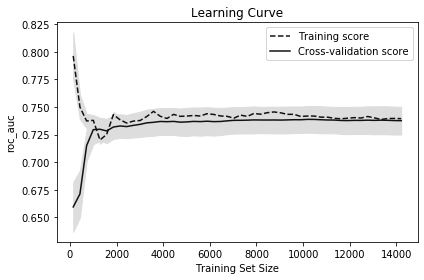

In [22]:
lrng_curve_roc_auc(LogisticRegression(),50)

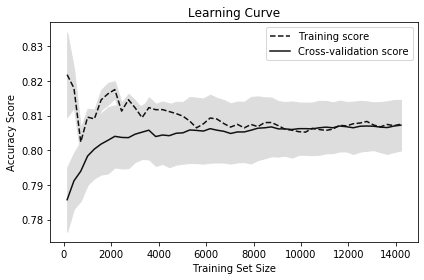

In [23]:
lrng_curve_accuracy(LogisticRegression(),50)

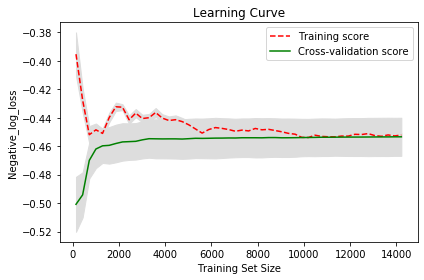

In [24]:
lrng_curve_neglogloss(LogisticRegression(),50)

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc= SVC(kernel = 'sigmoid')
svc.fit(X_train, Y_train)

svcpred = svc.predict(X_test)

print(confusion_matrix(Y_test, svcpred))
print(classification_report(Y_test,svcpred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred),3)*100))

CV_score_SVC_sigmoid = (cross_val_score(svc, X, Y, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_sigmoid = round(CV_score_SVC_sigmoid,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_sigmoid))


[[2461  641]
 [ 625  220]]
              precision    recall  f1-score   support

           0       0.80      0.79      0.80      3102
           1       0.26      0.26      0.26       845

    accuracy                           0.68      3947
   macro avg       0.53      0.53      0.53      3947
weighted avg       0.68      0.68      0.68      3947

Accuracy Score: 67.9
Cross-Validation Score: 78.60000000000001


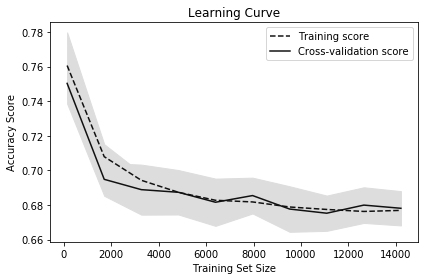

In [26]:
lrng_curve_accuracy(SVC(kernel= 'sigmoid'),10)

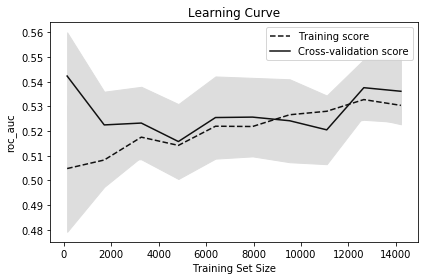

In [27]:
lrng_curve_roc_auc(SVC(kernel= 'sigmoid'),10)

In [29]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_linear = SVC(kernel = 'linear')
svc_linear.fit(X_train, Y_train)

svcpred_linear = svc_linear.predict(X_test)

print(confusion_matrix(Y_test, svcpred_linear))
print(classification_report(Y_test,svcpred_linear))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred_linear),3)*100))

CV_score_SVC_linear = (cross_val_score(svc_linear, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_linear = round(CV_score_SVC_linear,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_linear))

[[3102    0]
 [ 845    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3102
           1       0.00      0.00      0.00       845

    accuracy                           0.79      3947
   macro avg       0.39      0.50      0.44      3947
weighted avg       0.62      0.79      0.69      3947

Accuracy Score: 78.60000000000001
Cross-Validation Score: 78.5


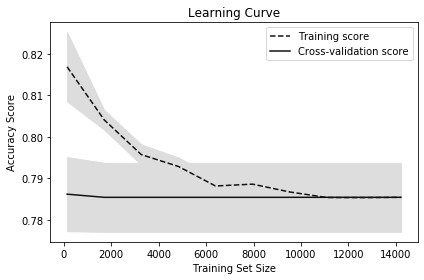

In [30]:
lrng_curve_accuracy(SVC(kernel = 'linear'),10)

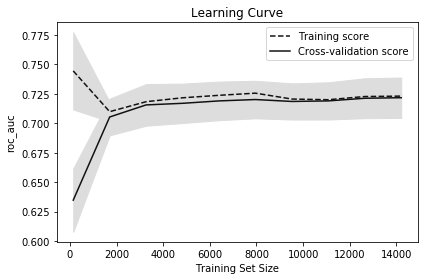

In [31]:
lrng_curve_roc_auc(SVC(kernel= 'linear'),10)

In [32]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

svc_gaussian = SVC(kernel = 'rbf')
svc_gaussian.fit(X_train, Y_train)

svcpred_gaussian = svc_gaussian.predict(X_test)

print(confusion_matrix(Y_test, svcpred_gaussian))
print(classification_report(Y_test,svcpred_gaussian))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, svcpred_gaussian),3)*100))

CV_score_SVC_gaussian = (cross_val_score(svc_gaussian, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
SVM_CV_gaussian = round(CV_score_SVC_gaussian,3)*100
print("Cross-Validation Score: {}".format(SVM_CV_gaussian))

[[2997  105]
 [ 546  299]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.90      3102
           1       0.74      0.35      0.48       845

    accuracy                           0.84      3947
   macro avg       0.79      0.66      0.69      3947
weighted avg       0.82      0.84      0.81      3947

Accuracy Score: 83.5
Cross-Validation Score: 83.5


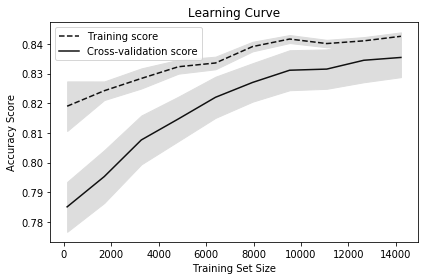

In [33]:
lrng_curve_accuracy(SVC(kernel = 'rbf'),10)

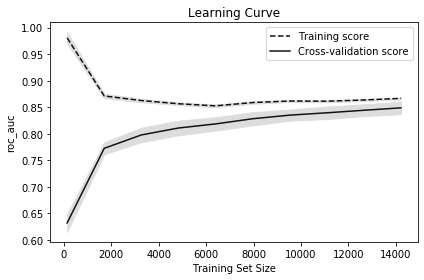

In [34]:
lrng_curve_roc_auc(SVC(kernel = 'rbf'),10)

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

d_tree = DecisionTreeClassifier(criterion='gini', max_depth = 5) #criterion = entopy, gini
d_tree.fit(X_train, Y_train)
d_tree_pred = d_tree.predict(X_test)

print(confusion_matrix(Y_test, d_tree_pred))
print(classification_report(Y_test,d_tree_pred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, d_tree_pred),3)*100))

CV_score_dtree = (cross_val_score(d_tree, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
d_tree_CV = round(CV_score_dtree,3)*100
print("Cross-Validation Score: {}".format(d_tree_CV))

[[3006   96]
 [ 700  145]]
              precision    recall  f1-score   support

           0       0.81      0.97      0.88      3102
           1       0.60      0.17      0.27       845

    accuracy                           0.80      3947
   macro avg       0.71      0.57      0.58      3947
weighted avg       0.77      0.80      0.75      3947

Accuracy Score: 79.80000000000001
Cross-Validation Score: 80.5


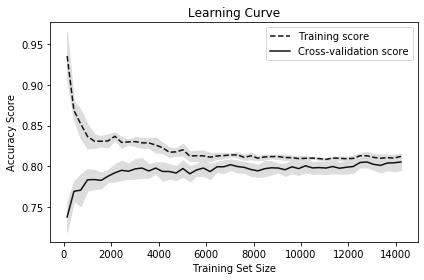

In [36]:
lrng_curve_accuracy(DecisionTreeClassifier(criterion='gini', max_depth = 5) ,50)

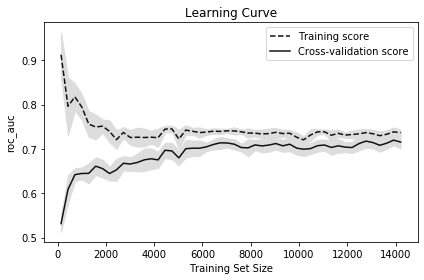

In [37]:
lrng_curve_roc_auc(DecisionTreeClassifier(criterion='gini', max_depth = 5) ,50)

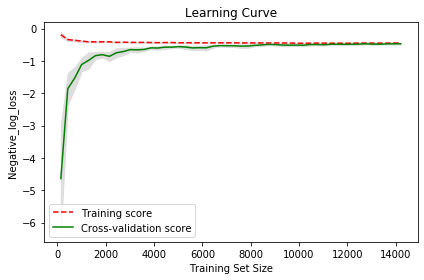

In [38]:
lrng_curve_neglogloss(DecisionTreeClassifier(criterion='gini', max_depth = 5) ,50)

In [39]:
from sklearn.ensemble import AdaBoostClassifier

AdaBoost_classifier = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2),
    n_estimators=200
)
AdaBoost_classifier.fit(X_train, Y_train)
Imp_features = AdaBoost_classifier.feature_importances_

AdaBoost_pred = AdaBoost_classifier.predict(X_test)

print(confusion_matrix(Y_test, AdaBoost_pred))
print(classification_report(Y_test,AdaBoost_pred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, AdaBoost_pred),3)*100))

CV_Score_AdaBoost = (cross_val_score(AdaBoost_classifier, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
AdaBoost_CV = round(CV_Score_AdaBoost,3)*100
print("Cross-Validation Score: {}".format(AdaBoost_CV))

[[2914  188]
 [ 385  460]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      3102
           1       0.71      0.54      0.62       845

    accuracy                           0.85      3947
   macro avg       0.80      0.74      0.76      3947
weighted avg       0.85      0.85      0.85      3947

Accuracy Score: 85.5
Cross-Validation Score: 85.2


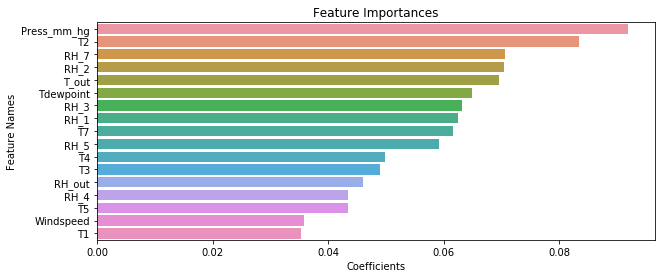

In [40]:
Imp_features = AdaBoost_classifier.feature_importances_

def plotfeatureimportances(train, importance):
    #Plots importance in a sorted order and shows the most significant variables at the top
    X = list(train.columns)
    X.remove('Appliances')
    feature_importance_df = pd.DataFrame(data = importance, index = X, columns=['coefficient_values'])
    feature_importance_df['sort'] = feature_importance_df.coefficient_values.abs()
    sorted_feature_imp_df = feature_importance_df.sort_values(by='sort', ascending=False).drop('sort', axis=1)
    fig, ax = plt.subplots()
    fig.set_size_inches(10,4)
    sb.barplot(np.array(sorted_feature_imp_df.coefficient_values), np.array(sorted_feature_imp_df.index.values))
    plt.title('Feature Importances')
    plt.xlabel('Coefficients')
    plt.ylabel('Feature Names')
    
plotfeatureimportances(energy_data1,Imp_features)

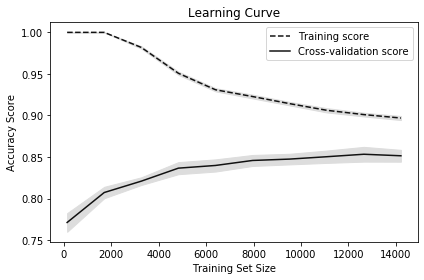

In [42]:
lrng_curve_accuracy(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200),10)

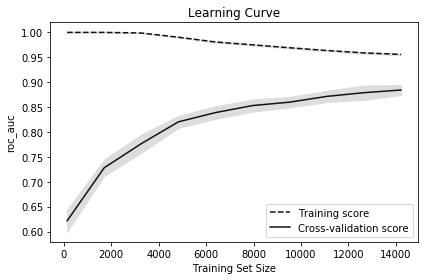

In [54]:
lrng_curve_roc_auc(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200),10)

In [ ]:
lrng_curve_neglogloss(AdaBoostClassifier(DecisionTreeClassifier(max_depth=2),n_estimators=200),10)

In [3]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 200)#criterion = entropy,gini
rfc.fit(X_train, Y_train)
rfcpred = rfc.predict(X_test)


print(confusion_matrix(Y_test, rfcpred))
print(classification_report(Y_test,rfcpred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, rfcpred),3)*100))

CV_score_rfc = (cross_val_score(d_tree, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
rfc_CV = round(CV_score_rfc,3)*100
print("Cross-Validation Score: {}".format(rfc_CV))

NameError: name 'X_train' is not defined

In [ ]:
models = pd.DataFrame({
                'Models': ['Logistic Model','SVM: kernel=sigmoid','SVM: kernel=linear','SVM: kernel=Gaussian','Decision Tree Classifier',
                           'AdaBoost Classifier'],
                'Accuracy':  [Logistic_CV, SVM_CV_sigmoid, SVM_CV_linear, SVM_CV_gaussian,d_tree_CV, AdaBoost_CV]})

models.sort_values(by='Accuracy', ascending=False)

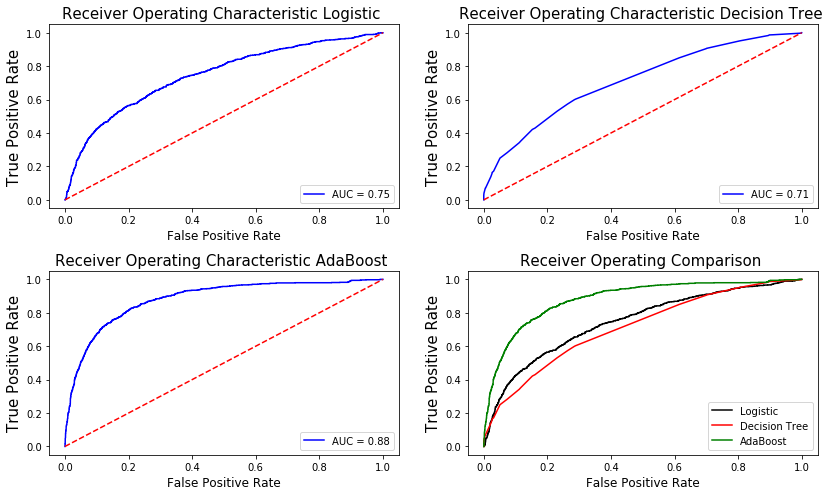

In [55]:
#ROCR curve comparison

#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (12,7))

# Logistic Model
probs = logmodel.predict_proba(X_test)
preds = probs[:,1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(Y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0,0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic Logistic ',fontsize=15)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})

# Decision Tree Classifier
probs = d_tree.predict_proba(X_test)
preds = probs[:,1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(Y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[0,1].plot(fprdtree, tprdtree, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic Decision Tree ',fontsize=15)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})

# AdaBoost Classifier
probs = AdaBoost_classifier.predict_proba(X_test)
preds = probs[:,1]
fprada, tprada, thresholdada = metrics.roc_curve(Y_test, preds)
roc_aucada = metrics.auc(fprada, tprada)

ax_arr[1,0].plot(fprada, tprada, 'b', label = 'AUC = %0.2f' % roc_aucada)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic AdaBoost ',fontsize=15)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})

#ALL PLOTS ----------------------------------
ax_arr[1,1].plot(fprlog, tprlog, 'b', label = 'Logistic', color='black')
ax_arr[1,1].plot(fprdtree, tprdtree, 'b', label = 'Decision Tree', color='red')
ax_arr[1,1].plot(fprada, tprada, 'b', label = 'AdaBoost', color='green')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=15)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [72]:
#Multi-Layer Perceptron 

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

def Classifier_MLP(activation_function,solver_function):
    MLP_Classifier = MLPClassifier(activation = activation_function, alpha=1e-05, batch_size='auto',
                  beta_1=0.9, beta_2=0.999, early_stopping=False,
                  epsilon=1e-08, hidden_layer_sizes=(15,5),
                  learning_rate='constant', learning_rate_init=0.001,
                  max_iter=200, momentum=0.9, n_iter_no_change=10,
                  nesterovs_momentum=True, power_t=0.5,  random_state=1,
                  shuffle=True, solver=solver_function, tol=0.0001,
                  validation_fraction=0.1, verbose=False, warm_start=False)
    MLP_Classifier.fit(X_train, Y_train)                         

    predict_MLP = MLP_Classifier.predict(X_test)


    Confusion_Matrix = confusion_matrix(Y_test, predict_MLP)
    print(Confusion_Matrix)

    print(classification_report(Y_test,predict_MLP))
    print("Accuracy Score: {}".format(round(accuracy_score(Y_test, predict_MLP),3)*100))

    CV_score_MLP = (cross_val_score(MLP_Classifier, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
    MLP_CV = round(CV_score_MLP,2)*100
    print("Cross-Validation Score: {}".format(MLP_CV))

In [73]:
# MLPClassifier with solver: 'lbfgs' and activation function: 'relu'
Classifier_MLP('relu','lbfgs')

[[2916  186]
 [ 451  394]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3102
           1       0.68      0.47      0.55       845

    accuracy                           0.84      3947
   macro avg       0.77      0.70      0.73      3947
weighted avg       0.83      0.84      0.83      3947

Accuracy Score: 83.89999999999999
Cross-Validation Score: 84.0


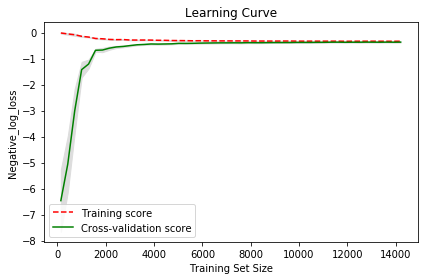

In [74]:
lrng_curve_neglogloss(MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

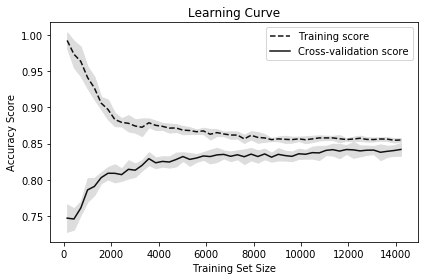

In [77]:
lrng_curve_accuracy(MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

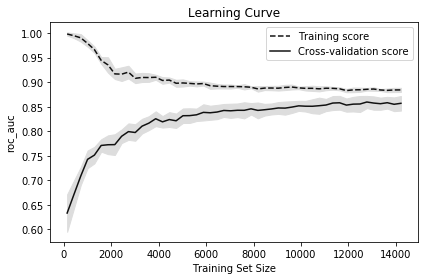

In [78]:
lrng_curve_roc_auc(MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [79]:
# MLPClassifier with solver: 'lbfgs' and activation function: 'logistic'
Classifier_MLP('logistic','lbfgs')

[[2896  206]
 [ 390  455]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3102
           1       0.69      0.54      0.60       845

    accuracy                           0.85      3947
   macro avg       0.78      0.74      0.76      3947
weighted avg       0.84      0.85      0.84      3947

Accuracy Score: 84.89999999999999
Cross-Validation Score: 84.0


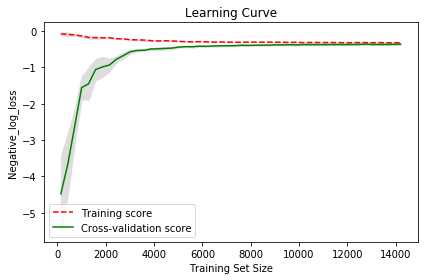

In [80]:
lrng_curve_neglogloss(MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

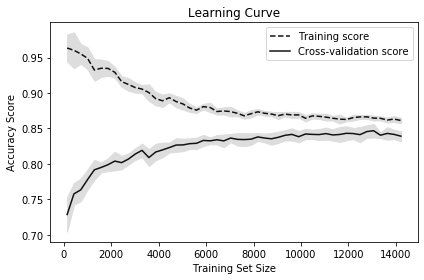

In [83]:
lrng_curve_accuracy(MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

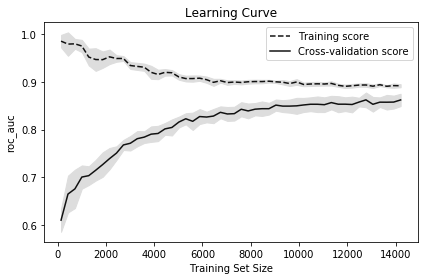

In [84]:
lrng_curve_roc_auc(MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [85]:
# MLPClassifier with solver: 'lbfgs' and activation function: 'tanh'
Classifier_MLP('tanh','lbfgs')

[[2869  233]
 [ 345  500]]
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      3102
           1       0.68      0.59      0.63       845

    accuracy                           0.85      3947
   macro avg       0.79      0.76      0.77      3947
weighted avg       0.85      0.85      0.85      3947

Accuracy Score: 85.39999999999999
Cross-Validation Score: 84.0


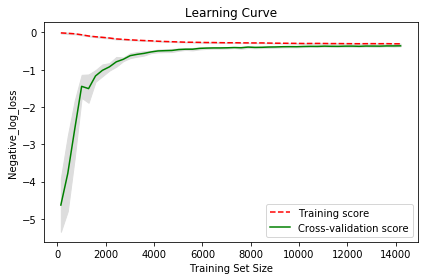

In [87]:
lrng_curve_neglogloss(MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

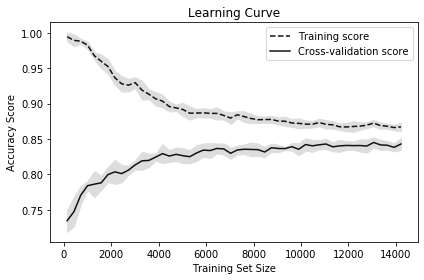

In [88]:
lrng_curve_accuracy(MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

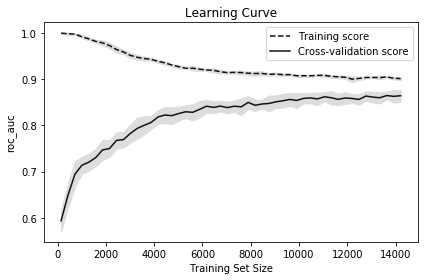

In [102]:
lrng_curve_roc_auc(MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [116]:
# MLPClassifier with solver: 'sgd' and activation function: 'relu'
Classifier_MLP('relu','sgd')

[[2967  135]
 [ 581  264]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.89      3102
           1       0.66      0.31      0.42       845

    accuracy                           0.82      3947
   macro avg       0.75      0.63      0.66      3947
weighted avg       0.80      0.82      0.79      3947

Accuracy Score: 81.89999999999999
Cross-Validation Score: 82.0


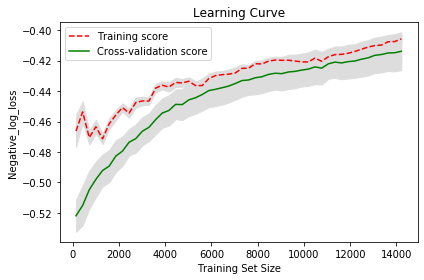

In [110]:
lrng_curve_neglogloss(MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

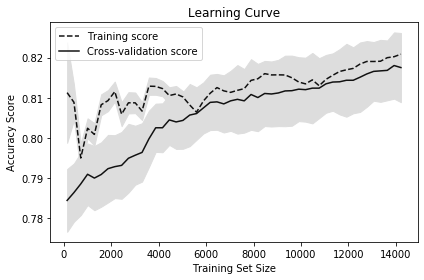

In [179]:
lrng_curve_accuracy(MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

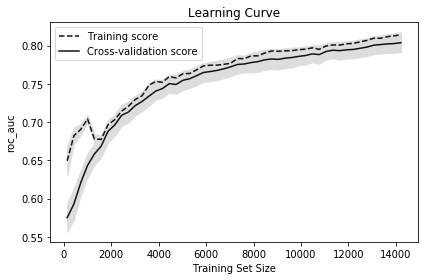

In [180]:
lrng_curve_roc_auc(MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [119]:
# MLPClassifier with solver: 'sgd' and activation function: 'logistic'
Classifier_MLP('logistic','sgd')

[[3102    0]
 [ 845    0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      3102
           1       0.00      0.00      0.00       845

    accuracy                           0.79      3947
   macro avg       0.39      0.50      0.44      3947
weighted avg       0.62      0.79      0.69      3947

Accuracy Score: 78.60000000000001
Cross-Validation Score: 79.0


In [ ]:
lrng_curve_neglogloss(MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [ ]:
lrng_curve_accuracy(MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [ ]:
lrng_curve_roc_auc(MLPClassifier(activation='logistic', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [120]:
# MLPClassifier with solver: 'sgd' and activation function: 'tanh'
Classifier_MLP('tanh','sgd')

[[2944  158]
 [ 577  268]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3102
           1       0.63      0.32      0.42       845

    accuracy                           0.81      3947
   macro avg       0.73      0.63      0.66      3947
weighted avg       0.79      0.81      0.79      3947

Accuracy Score: 81.39999999999999
Cross-Validation Score: 82.0


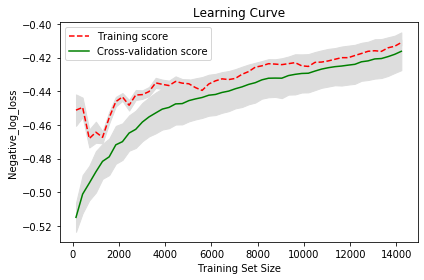

In [217]:
lrng_curve_neglogloss(MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [ ]:
lrng_curve_accuracy(MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [ ]:
lrng_curve_roc_auc(MLPClassifier(activation='tanh', alpha=1e-05, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False,
              epsilon=1e-08, hidden_layer_sizes=(15,5),
              learning_rate='constant', learning_rate_init=0.001,
              max_iter=200, momentum=0.9, n_iter_no_change=10,
              nesterovs_momentum=True, power_t=0.5,  random_state=1,
              shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False),50)

In [169]:
# keras model
def ann(activation_function):
    keras_model = Sequential()
    keras_model.add(Dense(15, input_dim= X_train.shape[1], activation='relu'))
    keras_model.add(Dense(12, activation='relu'))
    keras_model.add(Dense(7, activation='relu'))
    keras_model.add(Dense(1, activation = activation_function))
    # compile the keras model(Goodness of function)
    keras_model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    # fit the keras model on the dataset
    keras_model.fit(X_train, Y_train, epochs=150, batch_size=10, verbose=0)
    return keras_model

In [170]:
def learning_curve_accuracy(activation_function):
    keras_model = Sequential()
    keras_model.add(Dense(15, input_dim= X_train.shape[1], activation='relu'))
    keras_model.add(Dense(12, activation='relu'))
    keras_model.add(Dense(7, activation='relu'))
    keras_model.add(Dense(1, activation = activation_function))
    # compile the keras model(Goodness of function)
    keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    log_accuracy = keras_model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=150, batch_size=10,verbose=0)
    plt.plot(log_accuracy.history['accuracy'])
    plt.plot(log_accuracy.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('No. of iterations')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

In [171]:
def learning_curve_loss(activation_function):
    keras_model = Sequential()
    keras_model.add(Dense(15, input_dim= X_train.shape[1], activation='relu'))
    keras_model.add(Dense(12, activation='relu'))
    keras_model.add(Dense(7, activation='relu'))
    keras_model.add(Dense(1, activation = activation_function))
    # compile the keras model (Goodness of function)
    keras_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    log_accuracy = keras_model.fit(X_train, Y_train,validation_data = (X_test,Y_test), epochs=150, batch_size=10,verbose=0)
    plt.plot(log_accuracy.history['loss'])
    plt.plot(log_accuracy.history['val_loss'])
    plt.title('Log Loss')
    plt.ylabel('Loss')
    plt.xlabel('No. of iterations')
    plt.legend(['Train', 'Test'], loc='upper right')
    plt.show()

In [172]:
from keras import Sequential
from keras.layers import Dense


relu_model=ann('relu')
eval_relu_model=relu_model.evaluate(X_train, Y_train)
eval_relu_model

Y_pred_relu=relu_model.predict(X_test)
Y_pred_relu =(Y_pred_relu>0.5)
Confusion_Matrix = confusion_matrix(Y_test, Y_pred_relu)
print(Confusion_Matrix)

print(classification_report(Y_test,Y_pred_relu))

15788/15788 [==============================] - 0s 16us/step
[[2942  160]
 [ 524  321]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.90      3102
           1       0.67      0.38      0.48       845

    accuracy                           0.83      3947
   macro avg       0.76      0.66      0.69      3947
weighted avg       0.81      0.83      0.81      3947



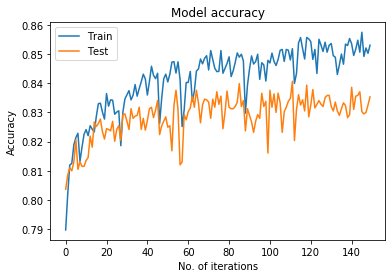

In [163]:
learning_curve_accuracy('relu')

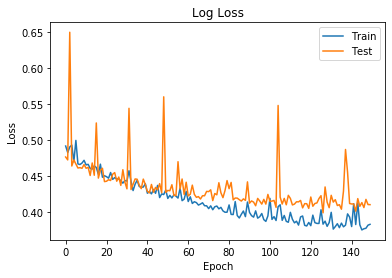

In [143]:
learning_curve_loss('relu')

In [125]:
from keras import Sequential
from keras.layers import Dense


tanh_model=ann('tanh')
eval_tanh_model=tanh_model.evaluate(X_train, Y_train)
eval_tanh_model

Y_pred_tanh=relu_model.predict(X_test)
Y_pred_tanh =(Y_pred_tanh>0.5)
Confusion_Matrix = confusion_matrix(Y_test, Y_pred_tanh)
print(Confusion_Matrix)
print(classification_report(Y_test,Y_pred_tanh))

15788/15788 [==============================] - ETA:  - 0s 16us/step
[[2848  254]
 [ 419  426]]
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      3102
           1       0.63      0.50      0.56       845

    accuracy                           0.83      3947
   macro avg       0.75      0.71      0.73      3947
weighted avg       0.82      0.83      0.82      3947



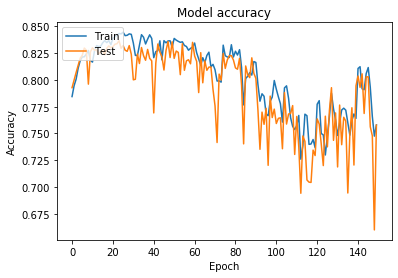

In [144]:
learning_curve_accuracy('tanh')

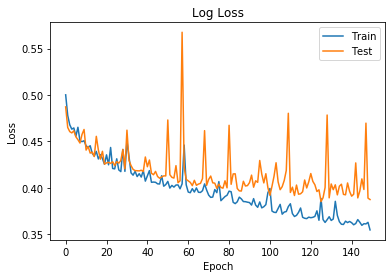

In [145]:
learning_curve_loss('tanh')

In [126]:
from keras import Sequential
from keras.layers import Dense


sigmoid_model=ann('sigmoid')
eval_sigmoid_model=sigmoid_model.evaluate(X_train, Y_train)
eval_sigmoid_model

Y_pred_sigmoid=sigmoid_model.predict(X_test)
Y_pred_sigmoid =(Y_pred_sigmoid>0.5)
Confusion_Matrix = confusion_matrix(Y_test, Y_pred_sigmoid)
print(Confusion_Matrix)
print(classification_report(Y_test,Y_pred_sigmoid))

15788/15788 [==============================] - 0s 17us/step
[[2812  290]
 [ 291  554]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3102
           1       0.66      0.66      0.66       845

    accuracy                           0.85      3947
   macro avg       0.78      0.78      0.78      3947
weighted avg       0.85      0.85      0.85      3947



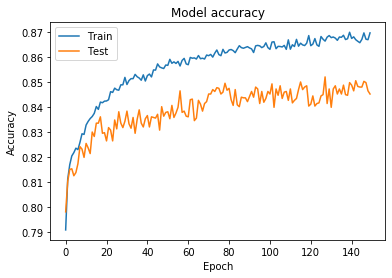

In [149]:
learning_curve_accuracy('sigmoid')

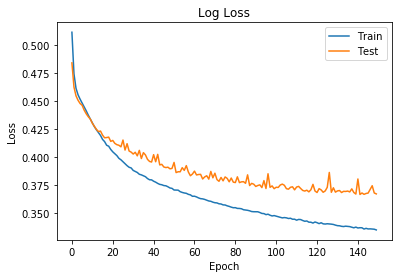

In [155]:
learning_curve_loss('sigmoid')

In [206]:
from sklearn.neighbors import KNeighborsClassifier

#import metrics model to check the accuracy 
from sklearn import metrics
#Try running from k=1 through 25 and record testing accuracy
k_range = range(1,30)
scores = {}
scores_list = []
for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k, weights='uniform', metric='euclidean')
        knn.fit(X_train,Y_train)
        Y_pred=knn.predict(X_test)
        scores[k] = metrics.accuracy_score(Y_test,Y_pred)
        scores_list.append(metrics.accuracy_score(Y_test,Y_pred))
        
print(scores)

{1: 0.9037243476057766, 2: 0.8953635672662782, 3: 0.8951102102862933, 4: 0.8867494299467951, 5: 0.8923232835064606, 6: 0.882949075247023, 7: 0.8826957182670383, 8: 0.8778819356473271, 9: 0.876615150747403, 10: 0.8720547251076767, 11: 0.8705345832277679, 12: 0.866734228527996, 13: 0.8674942994679503, 14: 0.8624271598682544, 15: 0.8634405877881935, 16: 0.8573600202685584, 17: 0.8581200912085128, 18: 0.8550798074486952, 19: 0.8563465923486192, 20: 0.8502660248289841, 21: 0.8522928806688624, 22: 0.8487458829490753, 23: 0.84899923992906, 24: 0.8449455282493032, 25: 0.8477324550291361, 26: 0.8441854573093489, 27: 0.8444388142893337, 28: 0.8411451735495313, 29: 0.8424119584494553}


Text(0, 0.5, 'Testing Accuracy')

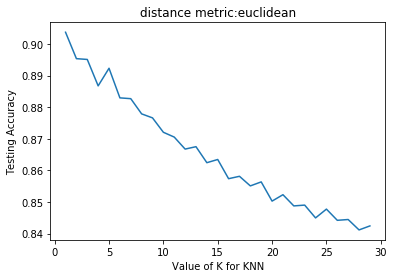

In [191]:
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.title('distance metric:euclidean')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [211]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
knn.fit(X_train, Y_train)
knnpred = knn.predict(X_test)

Confusion_Matrix = confusion_matrix(Y_test, knnpred)
print(Confusion_Matrix)

print(classification_report(Y_test,knnpred))
print("Accuracy Score: {}".format(round(accuracy_score(Y_test, knnpred),3)*100))

CV_score_knn = (cross_val_score(knn, X_train, Y_train, cv=k_fold, n_jobs=1, scoring = 'accuracy').mean())
knn_CV = round(CV_score_knn,2)*100
print("Cross-Validation Score: {}".format(knn_CV))

[[2914  188]
 [ 226  619]]
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      3102
           1       0.77      0.73      0.75       845

    accuracy                           0.90      3947
   macro avg       0.85      0.84      0.84      3947
weighted avg       0.89      0.90      0.89      3947

Accuracy Score: 89.5
Cross-Validation Score: 89.0


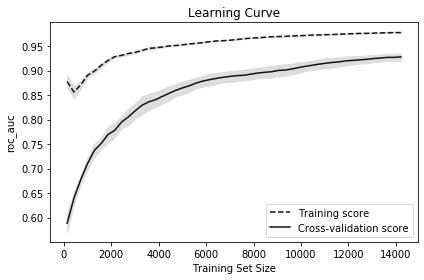

In [214]:
lrng_curve_roc_auc(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean'),50)

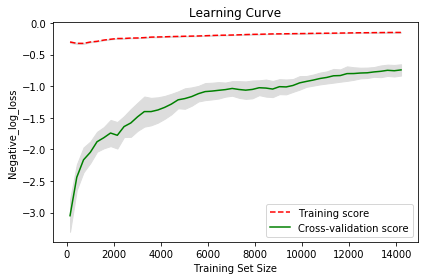

In [215]:
lrng_curve_neglogloss(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean'),50)

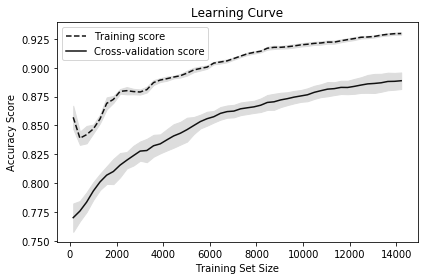

In [213]:
lrng_curve_accuracy(KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean'),50)

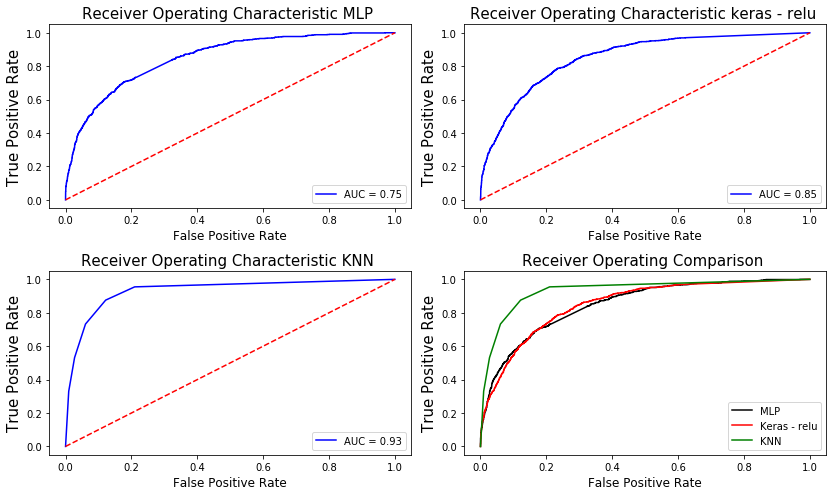

In [216]:
#ROCR curve comparison

#fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 4))
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (12,7))

# Multi-Layer Perceptron Classifier
probs = MLP_Classifier.predict_proba(X_test)
preds = probs[:,1]
fprmlp, tprmlp, thresholdmlp = metrics.roc_curve(Y_test, preds)
roc_aucmlp = metrics.auc(fprmlp, tprmlp)

ax_arr[0,0].plot(fprmlp, tprmlp, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0,0].plot([0, 1], [0, 1],'r--')
ax_arr[0,0].set_title('Receiver Operating Characteristic MLP ',fontsize=15)
ax_arr[0,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})

# TensorFlow - Keras: Activation function = 'tanh'
probs = relu_model.predict_proba(X_test)
fprkeras, tprkeras, thresholdkeras = metrics.roc_curve(Y_test, probs)
roc_aucdtree = metrics.auc(fprkeras, tprkeras)

ax_arr[0,1].plot(fprkeras, tprkeras, 'b', label = 'AUC = %0.2f' % roc_aucdtree)
ax_arr[0,1].plot([0, 1], [0, 1],'r--')
ax_arr[0,1].set_title('Receiver Operating Characteristic keras - relu ',fontsize=15)
ax_arr[0,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[0,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})

# KNN
probs = knn.predict_proba(X_test)
preds = probs[:,1]
fprknn, tprknn, thresholdknn = metrics.roc_curve(Y_test, preds)
roc_aucada = metrics.auc(fprknn, tprknn)

ax_arr[1,0].plot(fprknn, tprknn, 'b', label = 'AUC = %0.2f' % roc_aucada)
ax_arr[1,0].plot([0, 1], [0, 1],'r--')
ax_arr[1,0].set_title('Receiver Operating Characteristic KNN ',fontsize=15)
ax_arr[1,0].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,0].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})

#ALL PLOTS ----------------------------------
ax_arr[1,1].plot(fprmlp, tprmlp, 'b', label = 'MLP', color='black')
ax_arr[1,1].plot(fprkeras, tprkeras, 'b', label = 'Keras - relu', color='red')
ax_arr[1,1].plot(fprknn, tprknn, 'b', label = 'KNN', color='green')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=15)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=15)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=12)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 

In [166]:
MLP_Classifier = MLPClassifier(activation = 'relu', alpha=1e-05, batch_size='auto',
                  beta_1=0.9, beta_2=0.999, early_stopping=False,
                  epsilon=1e-08, hidden_layer_sizes=(15,5),
                  learning_rate='constant', learning_rate_init=0.001,
                  max_iter=200, momentum=0.9, n_iter_no_change=10,
                  nesterovs_momentum=True, power_t=0.5,  random_state=1,
                  shuffle=True, solver='lbfgs', tol=0.0001,
                  validation_fraction=0.1, verbose=False, warm_start=False)

MLP_Classifier.fit(X_train, Y_train)                         

predict_MLP = MLP_Classifier.predict(X_test)